In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import ttest_rel

In [2]:
df = pd.read_csv(
    "timings.csv",
    header=None,
    names=["run", "module", "approach", "request type", "duration (s)"],
)

In [3]:
df.groupby(by=["request type", "approach"]).agg(
    {"duration (s)": ["mean", "std", "count"]}
)

duration (s)                
                                     mean       std count
request type approach                                    
get_offset   dataclass-if        3.293361  0.069476    10
             dataclass-match     3.302519  0.092108    10
             tuple               3.265526  0.046443    10
get_range    dataclass-if        3.280768  0.073928    10
             dataclass-match     3.437923  0.177868    10
             tuple               3.306137  0.107723    10
get_suffix   dataclass-if        3.244530  0.004356    10
             dataclass-match     3.250161  0.008066    10
             tuple               3.231489  0.028170    10

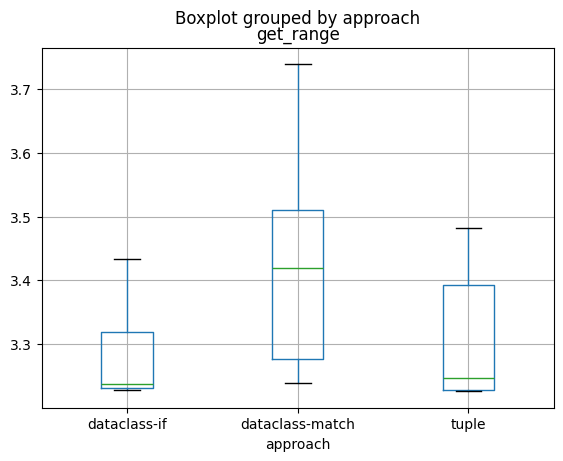

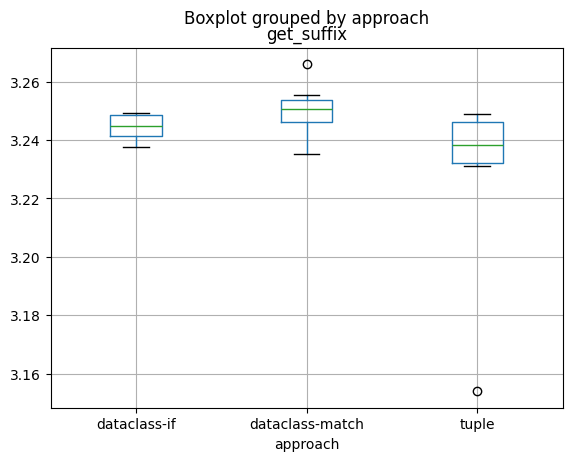

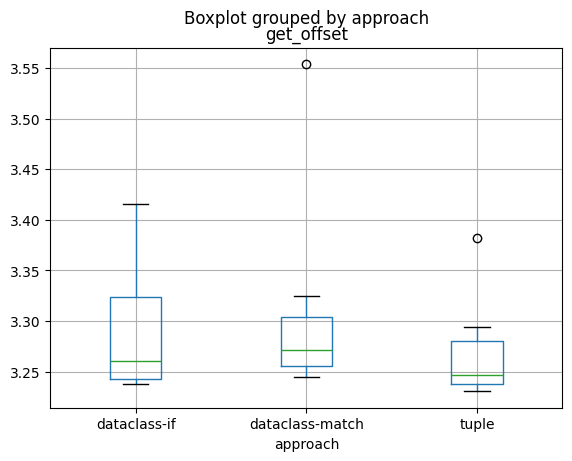

In [4]:
for method in ["get_range", "get_suffix", "get_offset"]:
    fig, ax = plt.subplots()
    df[df["request type"] == method].boxplot(
        ax=ax, column="duration (s)", by="approach"
    )
    ax.set_title(method)

In [5]:
def compare(method, name_a, name_b):
    print(f"{name_a} <-> {name_b}")
    a = df[(df["request type"] == method) & (df["approach"] == name_a)][
        "duration (s)"
    ].values
    b = df[(df["request type"] == method) & (df["approach"] == name_b)][
        "duration (s)"
    ].values
    print(ttest_rel(a, b))

In [6]:
for method in ["get_range", "get_suffix", "get_offset"]:
    print(method)
    name_a = "tuple"
    name_b = "dataclass-match"
    compare(method, name_a, name_b)
    name_b = "dataclass-if"
    compare(method, name_a, name_b)
    name_a = "dataclass-match"
    compare(method, name_a, name_b)

get_range
tuple <-> dataclass-match
TtestResult(statistic=np.float64(-2.7027215448474045), pvalue=np.float64(0.02428521810396037), df=np.int64(9))
tuple <-> dataclass-if
TtestResult(statistic=np.float64(0.7601664499194066), pvalue=np.float64(0.46660096593843936), df=np.int64(9))
dataclass-match <-> dataclass-if
TtestResult(statistic=np.float64(2.5010179493687965), pvalue=np.float64(0.03380531733617903), df=np.int64(9))
get_suffix
tuple <-> dataclass-match
TtestResult(statistic=np.float64(-1.954294426622429), pvalue=np.float64(0.08239638941407376), df=np.int64(9))
tuple <-> dataclass-if
TtestResult(statistic=np.float64(-1.4384655674182052), pvalue=np.float64(0.18415319916834988), df=np.int64(9))
dataclass-match <-> dataclass-if
TtestResult(statistic=np.float64(1.8938234694490295), pvalue=np.float64(0.09077996402461765), df=np.int64(9))
get_offset
tuple <-> dataclass-match
TtestResult(statistic=np.float64(-2.3865512035162304), pvalue=np.float64(0.04078733397554656), df=np.int64(9))
tuple